# Mushroom Classification
## Vicky Ke & Cerina Liu & Jianyin Zhu
## 05/14/2021

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

from time import perf_counter
from dmba import classificationSummary

from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold


import warnings 
warnings.filterwarnings('ignore')

## 1. Describe Dataset

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). We choose this dataset because it has non-numerical values in each row and column, which is a new challenge for us and would be a good way to practice. 




In [2]:
# data from Kaggle: https://www.kaggle.com/uciml/mushroom-classification
ms = pd.read_csv("mushrooms.csv")
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 1.1 Data Feature 

As we did in all other datasets, we first figure out all the categories and features that help decide the class of mushrooms. Then we check the types of all our values in order to prevent errors in the following data processing part. In addition, we checked the null values in our whole dataset, in order to finish the basic part of data cleaning.

In [3]:
ms.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [4]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 1.2 Check Null Values

In [5]:
#check errors
ms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### 1.3 Data Exploration

In [6]:
ms.shape

(8124, 23)

In [7]:
t1=ms.iloc[:,0:-1].describe()
t1
#t2=t1[t1['std']>1]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,1,4,3,5,9,6
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,p,w,o,p,w,v
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040


In [8]:
#sns.heatmap(ms.corr())

## 2. Visualization

In this section, we breifly check the correlation among each feature we have in our datasets. We find that the features are relatively standard and it is not continuous, so we did not show the distribution and it is not necessary to normalize it. According to the color distribution, it is hard to tell the useful information from this graph, which asks us to reflect the discrete variables again. Therefore, we stop visualized the original data, we want to build models and find more from the accuracy or other scores directly.

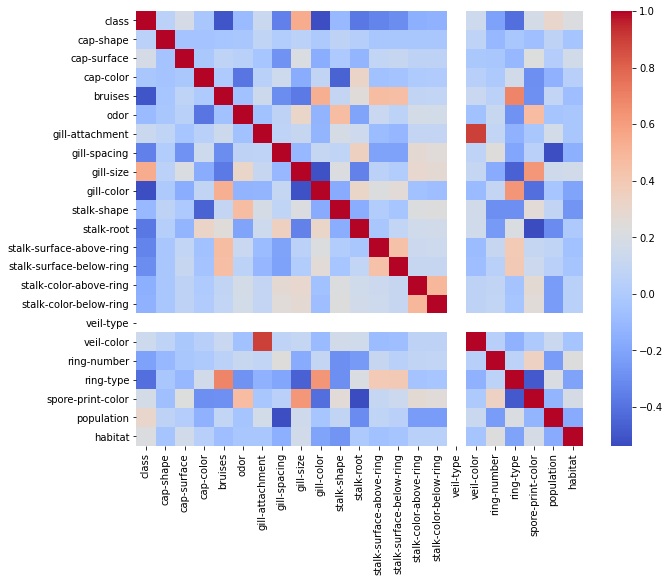

In [9]:
from sklearn.preprocessing import LabelEncoder
vis = ms.copy()
le = LabelEncoder()
for col in vis.columns:
  vis[col] = le.fit_transform(vis[col]) 
plt.figure(figsize=(10,8))
ax = sns.heatmap(vis.corr(),cmap="coolwarm")

## 3. Train Test Split

In this section, we numeric the values in order to help us process easily. We did the simple train and test split and check the value we set before moving on.

In [10]:
X = ms.iloc[:,1:23]
y = ms.iloc[:,[0]]

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
for col in X.columns:
    X[col] = le.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [12]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [13]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## 3.1 Standard Scaling

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.2  K-fold Cross Validation for 7 Models

We use for-loop to present the accuracy of K-fold cross-validation for 7 models and we surprisedly find that the models like Decision Tree, Random Forest, KNN, Support Vector Classifier have 100% accuracy. And other models like gradient Boostin works very well too. We want to deeply find that if our accuracy is true, so we create test scores, confusion matrix accuracy, recall score, precision score in the next section to see how models perform.

In [16]:
models=[("Logistic Regression", LogisticRegression()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Gradient Boostin", GradientBoostingClassifier()),
        ("KNeighbors", KNeighborsClassifier()),
        ("SVM", SVC()),
        ("Naive Bayes", GaussianNB())]

for name, model in models:
    kfold = KFold(n_splits=10)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[95m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

Logistic Regression: 0.9555 ± 0.0070
Decision Tree: 1.0000 ± 0.0000
Random Forest: 1.0000 ± 0.0000
Gradient Boostin: 1.0000 ± 0.0000
KNeighbors: 1.0000 ± 0.0000
SVM: 1.0000 ± 0.0000
Naive Bayes: 0.9206 ± 0.0090


## 4. Original 7 Models with its Test Score, Confusion Matrix Accuracy, Recall, Precision, and  Running Time

In this section, we not only get test scores, confusion matrix accuracy, recall score, precision score for our 7 models, but also add the time to evalute each models' efficiency. Our model contains: Logistic Regression, GaussianNB, KNN Classifier, Decision Tree Classifier,Random Forest Classifier, Gradient Boosting Classifier, Support Vector Classifier. According to the results of each model, we also visulize thier confusion martrix to let our readers easily understand the results. All the models work pretty well and their test scores are all over 90%. In addition, Decision Tree, Random Forest, KNN, Support Vector Classifier maintains their good performance. For instance, their recall and precision scores are very high, and statistics errors are pretty low.


In [17]:
def get_model_data(X_test,y_test,model,model_name):

    startTime = perf_counter()
    a = model.score(X_test,y_test)
    print("Test Score:",a)

    endTime = perf_counter()
    print()
    
    y_pred = cross_val_predict(model,X_test,y_test,cv=10)
    classificationSummary(y_test, y_pred)
    print()
    
    #y_pred_model = model.predict(X_test)
        
    rs = recall_score(y_test, y_pred,average=None)
    print("recall Score(y = 0):",rs[0])
    print("recall Score(y = 1):",rs[1])
    ps = precision_score(y_test, y_pred,average=None)
    print("precision Score(y = 0):",ps[0])
    print("precision Score(y = 1):",ps[1])
    

    b = round(np.mean(y_test-y_pred),4)
    c = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)
    d = round(metrics.mean_absolute_error(y_test, y_pred),4)

    print()
    print('Statistics')
    print('                     Mean Error (ME)  :',b)
    print('       Root Mean Squared Error (RMSE) :',c)
    print('            Mean Absolute Error (MAE) :',d)

    print()
    time = endTime-startTime
    print("Total time:",time)
    print()
    v = [model_name,round(a,3),round(rs[0],3),
        round(rs[1],3),round(ps[0],3),round(ps[1],3),b,c,d,round(time,3)]
    return v

In [18]:
 #all the models we used
lr = LogisticRegression(solver="liblinear").fit(X_train,y_train)
gnb = GaussianNB().fit(X_train,y_train)
knn = KNeighborsClassifier().fit(X_train,y_train)
tree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
rfc = RandomForestClassifier(n_estimators=100, random_state=42,verbose=False).fit(X_train,y_train)
gbmc = GradientBoostingClassifier(n_estimators=100, verbose=False).fit(X_train,y_train)
svm=SVC(random_state=42).fit(X_train,y_train)
models1 = [lr,gnb,knn,tree,rfc,gbmc,svm]

model_name = ["Logistic Regression","GaussianNB","KNeighbors Classifier",
             "Decision Tree Classifier","Random Forest Classifier",
             "Gradient Boosting Classifier","Support Vector Classifier"]

In [19]:
table_vector = []

-------------------------------
Logistic Regression
-------------------------------
Test Score: 0.963076923076923

Confusion Matrix (Accuracy 0.9502)

       Prediction
Actual   0   1
     0 811  31
     1  50 733

recall Score(y = 0): 0.9631828978622328
recall Score(y = 1): 0.9361430395913155
precision Score(y = 0): 0.9419279907084785
precision Score(y = 1): 0.9594240837696335

Statistics
                     Mean Error (ME)  : 0.0117
       Root Mean Squared Error (RMSE) : 0.2233
            Mean Absolute Error (MAE) : 0.0498

Total time: 0.0017869539999999517



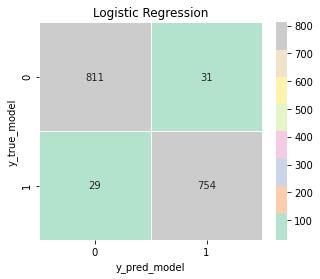

-------------------------------
GaussianNB
-------------------------------
Test Score: 0.9163076923076923

Confusion Matrix (Accuracy 0.6622)

       Prediction
Actual   0   1
     0 333 509
     1  40 743

recall Score(y = 0): 0.39548693586698336
recall Score(y = 1): 0.9489144316730523
precision Score(y = 0): 0.8927613941018767
precision Score(y = 1): 0.5934504792332268

Statistics
                     Mean Error (ME)  : -0.2886
       Root Mean Squared Error (RMSE) : 0.5812
            Mean Absolute Error (MAE) : 0.3378

Total time: 0.005213224999998545



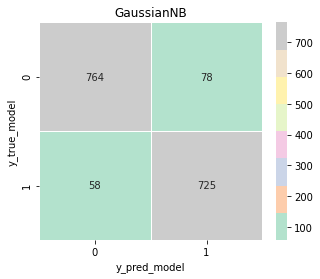

-------------------------------
KNeighbors Classifier
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 0.9963)

       Prediction
Actual   0   1
     0 840   2
     1   4 779

recall Score(y = 0): 0.997624703087886
recall Score(y = 1): 0.9948914431673053
precision Score(y = 0): 0.995260663507109
precision Score(y = 1): 0.9974391805377721

Statistics
                     Mean Error (ME)  : 0.0012
       Root Mean Squared Error (RMSE) : 0.0608
            Mean Absolute Error (MAE) : 0.0037

Total time: 0.25539181000000255



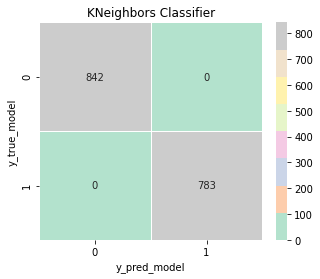

-------------------------------
Decision Tree Classifier
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 842   0
     1   0 783

recall Score(y = 0): 1.0
recall Score(y = 1): 1.0
precision Score(y = 0): 1.0
precision Score(y = 1): 1.0

Statistics
                     Mean Error (ME)  : 0.0
       Root Mean Squared Error (RMSE) : 0.0
            Mean Absolute Error (MAE) : 0.0

Total time: 0.0024985710000002825



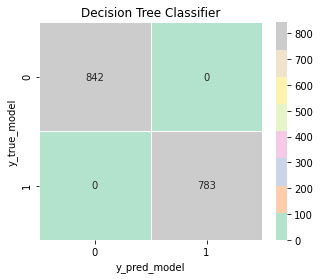

-------------------------------
Random Forest Classifier
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 0.9988)

       Prediction
Actual   0   1
     0 842   0
     1   2 781

recall Score(y = 0): 1.0
recall Score(y = 1): 0.9974457215836526
precision Score(y = 0): 0.9976303317535545
precision Score(y = 1): 1.0

Statistics
                     Mean Error (ME)  : 0.0012
       Root Mean Squared Error (RMSE) : 0.0351
            Mean Absolute Error (MAE) : 0.0012

Total time: 0.04560668999999962



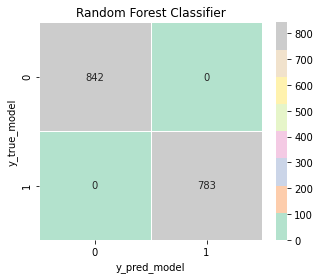

-------------------------------
Gradient Boosting Classifier
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 0.9988)

       Prediction
Actual   0   1
     0 842   0
     1   2 781

recall Score(y = 0): 1.0
recall Score(y = 1): 0.9974457215836526
precision Score(y = 0): 0.9976303317535545
precision Score(y = 1): 1.0

Statistics
                     Mean Error (ME)  : 0.0012
       Root Mean Squared Error (RMSE) : 0.0351
            Mean Absolute Error (MAE) : 0.0012

Total time: 0.04047046299999835



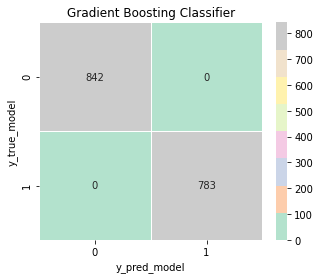

-------------------------------
Support Vector Classifier
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 0.9969)

       Prediction
Actual   0   1
     0 840   2
     1   3 780

recall Score(y = 0): 0.997624703087886
recall Score(y = 1): 0.9961685823754789
precision Score(y = 0): 0.99644128113879
precision Score(y = 1): 0.9974424552429667

Statistics
                     Mean Error (ME)  : 0.0006
       Root Mean Squared Error (RMSE) : 0.0555
            Mean Absolute Error (MAE) : 0.0031

Total time: 0.02019912200000107



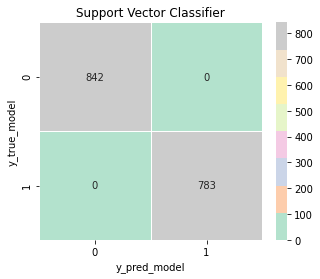

In [20]:

i=0

for model in models1:
    print("-------------------------------")
    print(model_name[i])
    print("-------------------------------")
    v = get_model_data(X_test,y_test,model,model_name[i])
    table_vector.append(v)
    y_pred_model = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_model)
    f, ax = plt.subplots(figsize =(5,4))
    sns.heatmap(cm,annot = True,cmap="Pastel2",linewidths=0.5,fmt = ".0f",ax=ax)
    plt.xlabel("y_pred_model")
    plt.ylabel("y_true_model")
    plt.title(model_name[i])
    plt.show()
    i=i+1

In [21]:
results = pd.DataFrame(data=table_vector,columns=['Model','Test Score','Recall(0)',
              'Recall(1)','Precision(0)','Precision(1)','ME','RMSE','MAE','Time'])

results[['Model','Test Score',
         'Recall(0)','Recall(1)',
         'Precision(0)','Precision(1)',
         'MAE','RMSE','Time']]


,Model,Test Score,Recall(0),Recall(1),Precision(0),Precision(1),MAE,RMSE,Time
0,Logistic Regression,0.963,0.963,0.936,0.942,0.959,0.0498,0.2233,0.002
1,GaussianNB,0.916,0.395,0.949,0.893,0.593,0.3378,0.5812,0.005
2,KNeighbors Classifier,1.000,0.998,0.995,0.995,0.997,0.0037,0.0608,0.255
3,Decision Tree Classifier,1.000,1.000,1.000,1.000,1.000,0.0000,0.0000,0.002
4,Random Forest Classifier,1.000,1.000,0.997,0.998,1.000,0.0012,0.0351,0.046
5,Gradient Boosting Classifier,1.000,1.000,0.997,0.998,1.000,0.0012,0.0351,0.040
6,Support Vector Classifier,1.000,0.998,0.996,0.996,0.997,0.0031,0.0555,0.020


## 5. Feature Importances

After successfully get the scores and accuracy for each model, we pick the best 3 models to present the feature importance.

### 5.1 Decision Tree and its Feature Importance Graph

Text(0.5, 0, 'Decision Tree Feature Importance')

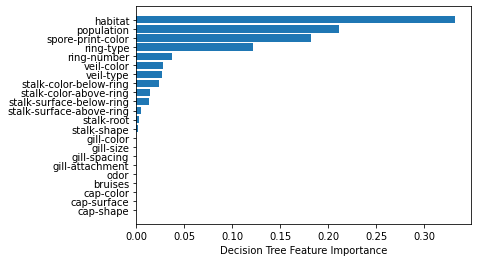

In [22]:
tree.feature_importances_
sorted_idx = tree.feature_importances_.argsort()
plt.barh(X.columns.tolist(), tree.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

### 5.2 Random Forest and its Feature Importance Graph

Text(0.5, 0, 'Random Forest Feature Importance')

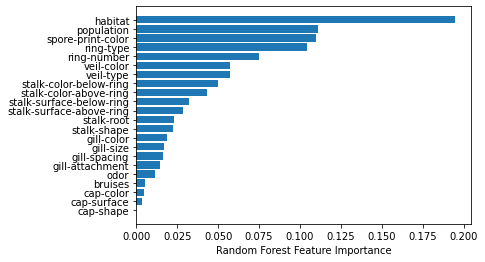

In [23]:
rfc.feature_importances_
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X.columns.tolist(), rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### 5.3 Gradient Boosting and its Feature Importance Graph

Text(0.5, 0, 'Gradient Boosting Feature Importance')

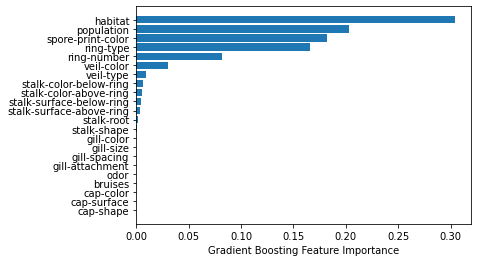

In [24]:
gbmc.feature_importances_
sorted_idx = gbmc.feature_importances_.argsort()
plt.barh(X.columns.tolist(), gbmc.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

## 6. PCA Applications in 7 Models

We did the same thing for our 7 models after PCA. Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. After we sandardadize our data, we succefully reduce dimension from 22 to 8. 


In [25]:
#train test split after pca
X = StandardScaler().fit_transform(X)
pca1 = PCA()
pca1.fit_transform(X)

num_components1 = len(pca1.explained_variance_ratio_)
ind = np.arange(num_components1)
vals = pca1.explained_variance_ratio_
cumvals = np.cumsum(vals)

pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca1.explained_variance_),
                           'Proportion of variance': pca1.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca1.explained_variance_ratio_)})

pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['pca{}'.format(i) for i in range(1, len(pcaSummary.columns) + 1)]
pcaSummary.round(4)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22
Standard deviation,1.9683,1.6135,1.5494,1.4720,1.3050,1.1811,0.9893,0.9757,0.8775,0.8437,...,0.7139,0.6908,0.6201,0.5579,0.4676,0.3994,0.3627,0.2706,0.2482,0.0
Proportion of variance,0.1845,0.1240,0.1143,0.1032,0.0811,0.0664,0.0466,0.0453,0.0367,0.0339,...,0.0243,0.0227,0.0183,0.0148,0.0104,0.0076,0.0063,0.0035,0.0029,0.0
Cumulative proportion,0.1845,0.3084,0.4227,0.5259,0.6070,0.6734,0.7200,0.7653,0.8020,0.8359,...,0.9135,0.9362,0.9545,0.9693,0.9797,0.9873,0.9936,0.9971,1.0000,1.0


In [26]:
#reduce deminsion to X only
num_components2 = len(cumvals[cumvals <= 0.80])
print(num_components2)

# return PCA with components that explain 80% of the variance
pca2 = PCA(n_components = num_components2, whiten=True)
principalcomponents = pca2.fit_transform(X)
np.cumsum(pca2.explained_variance_ratio_)

8


array([0.18445868, 0.30841458, 0.42272138, 0.52588712, 0.60697389,
       0.67339218, 0.71999614, 0.76532088])

In [27]:
pcaDF = pd.DataFrame(data = principalcomponents[:, 0:8], columns = pcaSummary.columns.tolist()[0:8])

In [28]:
y = pd.DataFrame(y)

In [29]:
#new dataset using PCA
mushroomPCA = pd.concat([pcaDF, y], axis = 1)
mushroomPCA.index += 1

In [30]:
mushroomPCA

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,0
1,-0.291789,-0.604759,-0.788522,0.126024,-1.112580,-1.302411,1.219301,1.583870,1
2,-1.159443,0.172955,-0.774798,0.184822,-1.150610,-1.258988,1.094253,-0.349049,0
3,-0.943991,-0.167940,-0.885725,0.717373,-1.387207,-0.740162,-1.787184,-0.293537,0
4,-0.449520,-0.468835,-0.866168,0.251471,-1.617801,-1.786675,1.101735,1.274771,1
5,0.350365,0.768059,-2.009277,0.553485,1.181387,-0.470707,0.592198,1.638406,0
...,...,...,...,...,...,...,...,...,...
8120,-1.140513,-0.569283,1.632041,4.384855,2.136045,-1.127270,0.283630,0.623027,0
8121,-1.289840,-1.036081,2.791022,5.112762,3.045810,-1.846342,1.690251,0.214880,0
8122,-0.823824,-0.469492,1.764246,4.384296,1.899061,-1.332666,-0.326713,0.306344,0
8123,1.864884,-0.640082,0.108723,-0.099549,-0.117981,-0.386917,-0.338847,-0.195309,1


In [31]:
mushroomPCA.rename(columns={0:'class'}, inplace=True)
print(mushroomPCA.columns)

Index(['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8',
       'class'],
      dtype='object')


In [32]:
mushroomPCA.dtypes

pca1     float64
pca2     float64
pca3     float64
pca4     float64
pca5     float64
pca6     float64
pca7     float64
pca8     float64
class      int64
dtype: object

### 6.1 PCA Train Test Split

In [33]:
# x and y value using pca
PCA_predictors = mushroomPCA
xPCA = PCA_predictors.drop('class',axis=1)
yPCA = mushroomPCA["class"]

In [34]:
xTrain,xTest,yTrain,yTest = train_test_split(xPCA, yPCA, test_size=0.2,random_state=42)

In [35]:
lr = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knn = KNeighborsClassifier().fit(xTrain,yTrain)
tree = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(n_estimators=100, random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(n_estimators=100, verbose=False).fit(xTrain,yTrain)
svm=SVC(random_state=42).fit(xTrain,yTrain)
models = [lr,gnb,knn,tree,rfc,gbmc,svm]

model_name = ["Logistic Regression(PCA)","GaussianNB(PCA)","KNeighbors Classifier(PCA)",
             "Decision Tree Classifier(PCA)","Random Forest Classifier(PCA)",
             "Gradient Boosting Classifier(PCA)","Support Vector Classifier(PCA)"]

-------------------------------
Logistic Regression(PCA)
-------------------------------
Test Score: 0.8923076923076924

Confusion Matrix (Accuracy 0.8898)

       Prediction
Actual   0   1
     0 781  62
     1 117 665

recall Score(y = 0): 0.9264531435349941
recall Score(y = 1): 0.850383631713555
precision Score(y = 0): 0.8697104677060133
precision Score(y = 1): 0.9147180192572214

Statistics
                     Mean Error (ME)  : 0.0338
       Root Mean Squared Error (RMSE) : 0.3319
            Mean Absolute Error (MAE) : 0.1102

Total time: 0.003471763000000294



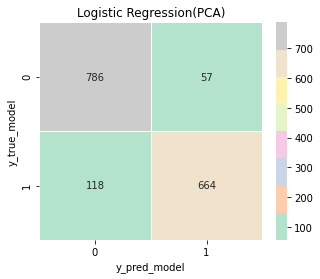

-------------------------------
GaussianNB(PCA)
-------------------------------
Test Score: 0.9021538461538462

Confusion Matrix (Accuracy 0.9022)

       Prediction
Actual   0   1
     0 782  61
     1  98 684

recall Score(y = 0): 0.9276393831553974
recall Score(y = 1): 0.8746803069053708
precision Score(y = 0): 0.8886363636363637
precision Score(y = 1): 0.9181208053691275

Statistics
                     Mean Error (ME)  : 0.0228
       Root Mean Squared Error (RMSE) : 0.3128
            Mean Absolute Error (MAE) : 0.0978

Total time: 0.0073963620000014885



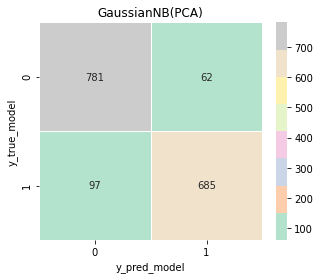

-------------------------------
KNeighbors Classifier(PCA)
-------------------------------
Test Score: 0.9963076923076923

Confusion Matrix (Accuracy 0.9883)

       Prediction
Actual   0   1
     0 837   6
     1  13 769

recall Score(y = 0): 0.9928825622775801
recall Score(y = 1): 0.9833759590792839
precision Score(y = 0): 0.9847058823529412
precision Score(y = 1): 0.9922580645161291

Statistics
                     Mean Error (ME)  : 0.0043
       Root Mean Squared Error (RMSE) : 0.1081
            Mean Absolute Error (MAE) : 0.0117

Total time: 0.08662816999999734



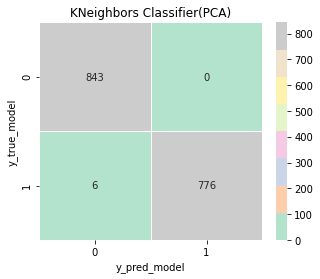

-------------------------------
Decision Tree Classifier(PCA)
-------------------------------
Test Score: 0.9907692307692307

Confusion Matrix (Accuracy 0.9729)

       Prediction
Actual   0   1
     0 823  20
     1  24 758

recall Score(y = 0): 0.9762752075919335
recall Score(y = 1): 0.969309462915601
precision Score(y = 0): 0.9716646989374262
precision Score(y = 1): 0.974293059125964

Statistics
                     Mean Error (ME)  : 0.0025
       Root Mean Squared Error (RMSE) : 0.1646
            Mean Absolute Error (MAE) : 0.0271

Total time: 0.0035221569999990265



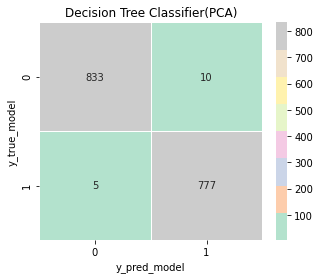

-------------------------------
Random Forest Classifier(PCA)
-------------------------------
Test Score: 0.9987692307692307

Confusion Matrix (Accuracy 0.9865)

       Prediction
Actual   0   1
     0 839   4
     1  18 764

recall Score(y = 0): 0.9952550415183867
recall Score(y = 1): 0.9769820971867008
precision Score(y = 0): 0.9789964994165694
precision Score(y = 1): 0.9947916666666666

Statistics
                     Mean Error (ME)  : 0.0086
       Root Mean Squared Error (RMSE) : 0.1164
            Mean Absolute Error (MAE) : 0.0135

Total time: 0.05417133699999965



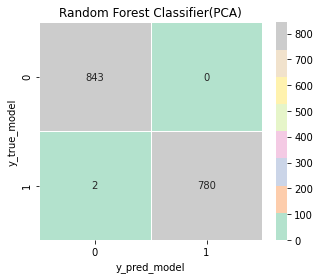

-------------------------------
Gradient Boosting Classifier(PCA)
-------------------------------
Test Score: 0.9926153846153846

Confusion Matrix (Accuracy 0.9772)

       Prediction
Actual   0   1
     0 832  11
     1  26 756

recall Score(y = 0): 0.9869513641755635
recall Score(y = 1): 0.9667519181585678
precision Score(y = 0): 0.9696969696969697
precision Score(y = 1): 0.9856584093872229

Statistics
                     Mean Error (ME)  : 0.0092
       Root Mean Squared Error (RMSE) : 0.1509
            Mean Absolute Error (MAE) : 0.0228

Total time: 0.00857600700000205



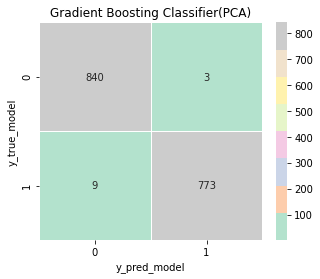

-------------------------------
Support Vector Classifier(PCA)
-------------------------------
Test Score: 0.992

Confusion Matrix (Accuracy 0.9723)

       Prediction
Actual   0   1
     0 817  26
     1  19 763

recall Score(y = 0): 0.9691577698695136
recall Score(y = 1): 0.9757033248081841
precision Score(y = 0): 0.9772727272727273
precision Score(y = 1): 0.9670468948035488

Statistics
                     Mean Error (ME)  : -0.0043
       Root Mean Squared Error (RMSE) : 0.1664
            Mean Absolute Error (MAE) : 0.0277

Total time: 0.024589487000000076



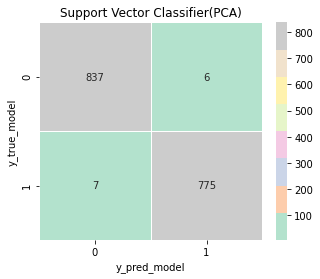

In [36]:
i=0
for model in models:
    print("-------------------------------")
    print(model_name[i])
    print("-------------------------------")
    v = get_model_data(xTest,yTest,model,model_name[i])
    table_vector.append(v)
    y_pred_model = model.predict(xTest)
    cm = confusion_matrix(yTest, y_pred_model)
    f, ax = plt.subplots(figsize =(5,4))
    sns.heatmap(cm,annot = True,cmap="Pastel2",linewidths=0.5,fmt = ".0f",ax=ax)
    plt.xlabel("y_pred_model")
    plt.ylabel("y_true_model")
    plt.title(model_name[i])
    plt.show()
    i=i+1

### 6.2 Models Comparison

In this case, we collect and reorganize the results of all the models before PCA and after PCA. We finally pick Random Forest as our best model since it has the highest Test Score and the lowest RMSE.

In [37]:
results1 = pd.DataFrame(data=table_vector,columns=['Model','Test Score','Recall(0)',
              'Recall(1)','Precision(0)','Precision(1)','ME','RMSE','MAE','Time'])
results1.index += 1
results1[['Model','Test Score',
         'Recall(0)','Recall(1)',
         'Precision(0)','Precision(1)',
         'MAE','RMSE','Time']]

,Model,Test Score,Recall(0),Recall(1),Precision(0),Precision(1),MAE,RMSE,Time
1,Logistic Regression,0.963,0.963,0.936,0.942,0.959,0.0498,0.2233,0.002
2,GaussianNB,0.916,0.395,0.949,0.893,0.593,0.3378,0.5812,0.005
3,KNeighbors Classifier,1.000,0.998,0.995,0.995,0.997,0.0037,0.0608,0.255
4,Decision Tree Classifier,1.000,1.000,1.000,1.000,1.000,0.0000,0.0000,0.002
5,Random Forest Classifier,1.000,1.000,0.997,0.998,1.000,0.0012,0.0351,0.046
6,Gradient Boosting Classifier,1.000,1.000,0.997,0.998,1.000,0.0012,0.0351,0.040
7,Support Vector Classifier,1.000,0.998,0.996,0.996,0.997,0.0031,0.0555,0.020
8,Logistic Regression(PCA),0.892,0.926,0.850,0.870,0.915,0.1102,0.3319,0.003
9,GaussianNB(PCA),0.902,0.928,0.875,0.889,0.918,0.0978,0.3128,0.007
10,KNeighbors Classifier(PCA),0.996,0.993,0.983,0.985,0.992,0.0117,0.1081,0.087


<function matplotlib.pyplot.show(close=None, block=None)>

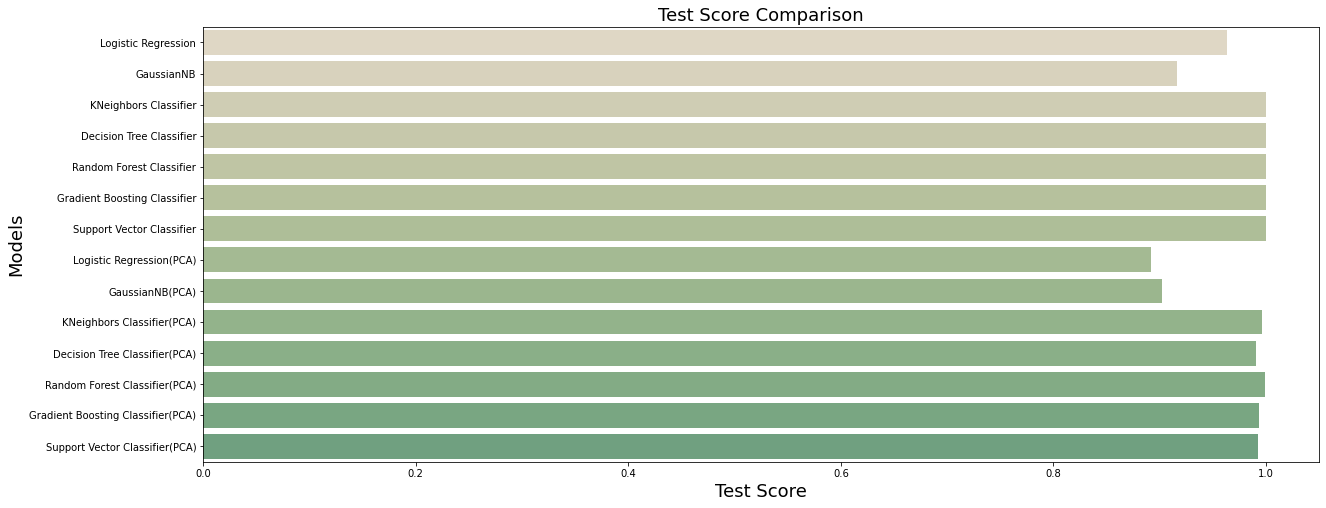

In [38]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x = 'Test Score',y= 'Model', data=results1, palette = sns.cubehelix_palette(len('Coefficient of determination(R^2)'), start=.5, rot=-.85))
plt.xlabel("Test Score", fontsize = 18)
plt.ylabel("Models", fontsize = 18)
plt.title("Test Score Comparison", fontsize = 18)
plt.show

### 6.3 Feature Importances

#### 6.3.1 Decision Tree and its Feature Importance

Text(0.5, 0, 'Decision Tree Feature Importance')

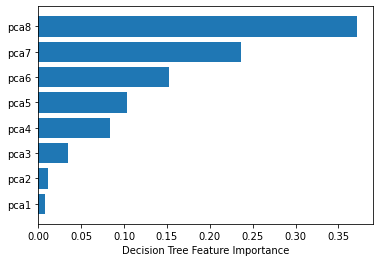

In [39]:
tree.feature_importances_
sorted_idx = tree.feature_importances_.argsort()
plt.barh(xPCA.columns.tolist(), tree.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

#### 6.3.2 Random Forest and its Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

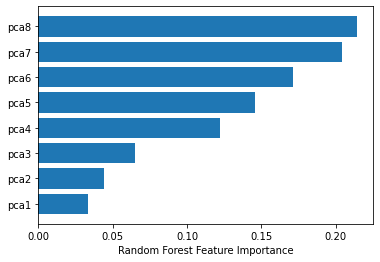

In [40]:
rfc.feature_importances_
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(xPCA.columns.tolist(), rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### 6.3.3 Gradient Boosting and its Feature Importance

Text(0.5, 0, 'Gradient Boosting Feature Importance')

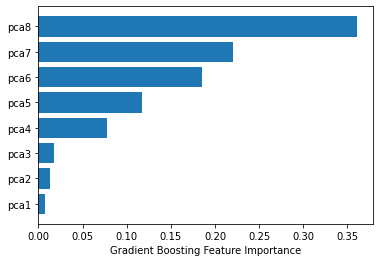

In [41]:
gbmc.feature_importances_
sorted_idx = gbmc.feature_importances_.argsort()
plt.barh(xPCA.columns.tolist(), gbmc.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

## 7. Fit the Model with Unseen Data

### 7.1 Data Exploration

In [42]:
new_ms = pd.read_csv("new_mushroom.csv")
new_ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [43]:
new_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     1999 non-null   object
 1   cap-shape                 1999 non-null   object
 2   cap-surface               1999 non-null   object
 3   cap-color                 1999 non-null   object
 4   bruises                   1999 non-null   object
 5   odor                      1999 non-null   object
 6   gill-attachment           1999 non-null   object
 7   gill-spacing              1999 non-null   object
 8   gill-size                 1999 non-null   object
 9   gill-color                1999 non-null   object
 10  stalk-shape               1999 non-null   object
 11  stalk-root                1999 non-null   object
 12  stalk-surface-above-ring  1999 non-null   object
 13  stalk-surface-below-ring  1999 non-null   object
 14  stalk-color-above-ring  

In [44]:
X_unseen = new_ms.iloc[:,1:23]
y_unseen = new_ms.iloc[:,[0]]

In [45]:
le = LabelEncoder() 
for col in X_unseen.columns:
    X_unseen[col] = le.fit_transform(X_unseen[col])
Encoder_y_unseen=LabelEncoder()
y_unseen = Encoder_y_unseen.fit_transform(y_unseen)
X_unseen.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,3,1,2,1,4,0,0,1,2,0,...,2,3,3,0,0,0,2,1,2,4
1,3,1,4,1,0,0,0,0,2,0,...,2,3,3,0,0,0,2,2,1,1
2,0,1,3,1,2,0,0,0,3,0,...,2,3,3,0,0,0,2,2,1,2
3,3,2,3,1,4,0,0,1,3,0,...,2,3,3,0,0,0,2,1,2,4
4,3,1,1,0,3,0,1,0,2,1,...,2,3,3,0,0,0,0,2,0,1


In [46]:
print(X_unseen.shape)
print(y_unseen.shape)

(1999, 22)
(1999,)


## 7.2 Train Test Split

In the section of scaling our model into unseen data, we get pretty good K-fold cross validation score.

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_unseen, y_unseen, test_size=0.2, random_state=40)

In [48]:
models=[("Logistic Regression", LogisticRegression()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Gradient Boostin", GradientBoostingClassifier()),
        ("KNeighbors", KNeighborsClassifier()),
        ("SVM", SVC()),
        ("Naive Bayes", GaussianNB())]

for name, model in models:
    kfold = KFold(n_splits=10)
    results_unseen = cross_val_score(model, X_train1, y_train1, cv=kfold, scoring='accuracy')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[95m{results_unseen.mean():.4f}\x1b[0m ± {results_unseen.std():.4f}")

Logistic Regression: 0.9994 ± 0.0019
Decision Tree: 0.9994 ± 0.0019
Random Forest: 0.9994 ± 0.0019
Gradient Boostin: 0.9994 ± 0.0019
KNeighbors: 0.9994 ± 0.0019
SVM: 0.9994 ± 0.0019
Naive Bayes: 0.9994 ± 0.0019


### 7.3 Test Unseen Data by Using the Best model (Decision Tree Classifier)

-------------------------------
Decision Tree Classifier(Best Model)
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 360   0
     1   0  40

recall Score(y = 0): 1.0
recall Score(y = 1): 1.0
precision Score(y = 0): 1.0
precision Score(y = 1): 1.0

Statistics
                     Mean Error (ME)  : 0.0
       Root Mean Squared Error (RMSE) : 0.0
            Mean Absolute Error (MAE) : 0.0

Total time: 0.0025999269999985586



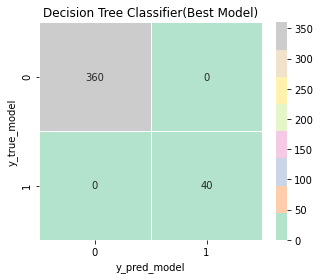

In [49]:
print("-------------------------------")
print("Decision Tree Classifier(Best Model)")
print("-------------------------------")

tree_unseen = tree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train).fit(X_train1, y_train1)
startTime = perf_counter()
a = tree_unseen.score(X_test1,y_test1)
print("Test Score:", a)

endTime = perf_counter()
print()

y_pred = cross_val_predict(tree_unseen, X_test1, y_test1, cv=10)
classificationSummary(y_test1, y_pred)
print()

rs = recall_score(y_test1, y_pred,average=None)
print("recall Score(y = 0):",rs[0])
print("recall Score(y = 1):",rs[1])
ps = precision_score(y_test1, y_pred,average=None)
print("precision Score(y = 0):",ps[0])
print("precision Score(y = 1):",ps[1])

b = round(np.mean(y_test1-y_pred),4)
c = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)),4)
d = round(metrics.mean_absolute_error(y_test1, y_pred),4)

print()
print('Statistics')
print('                     Mean Error (ME)  :',b)
print('       Root Mean Squared Error (RMSE) :',c)
print('            Mean Absolute Error (MAE) :',d)

print()
time = endTime-startTime
print("Total time:",time)
print()

y_pred_model = tree_unseen.predict(X_test1)
cm = confusion_matrix(y_test1, y_pred_model)
f, ax = plt.subplots(figsize =(5,4))
sns.heatmap(cm,annot = True,cmap="Pastel2",linewidths=0.5,fmt = ".0f",ax=ax)
plt.xlabel("y_pred_model")
plt.ylabel("y_true_model")
plt.title("Decision Tree Classifier(Best Model)")
plt.show()

### 7.4 Unseen Data and its Decision Tree Feature Importance

Text(0.5, 0, 'Decision Tree Feature Importance')

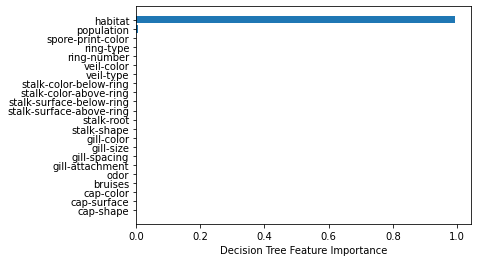

In [50]:
tree_unseen.feature_importances_
sorted_idx = tree_unseen.feature_importances_.argsort()
plt.barh(X_unseen.columns.tolist(), tree_unseen.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")